# Lecture 9 – Table Fundamentals and Visualization Demo

### Spark 010, Spring 2024

In this notebook, we will look at state populations for the years 2020 through 2023 and look for growth trends. We will also compare state population with land mass to get an idea of which states are the most densely populated.

### Part I - State Populations by year

As always, we'll start by importing the requisite packages.

In [19]:
import pandas as pd

Let's import a table that has U.S. state population by year from 2020-2023.


The source of the dataset is [census.gov](https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html).


In [20]:
state_pops = pd.read_csv("data/state_pops.csv")

In [21]:
state_pops.head()

,State,2020,2021,2022,2023
0,Alabama,5031864,5050380,5073903,5108468
1,Alaska,732964,734923,733276,733406
2,Arizona,7186683,7272487,7365684,7431344
3,Arkansas,3014348,3028443,3046404,3067732
4,California,39503200,39145060,39040616,38965193


Without looking at the data, which states do you think are growing the fastest: Northeast, Midwest, South, or West states?

I think the west - but I have NO idea why!!

Let's make a percent change column that represents the percentage change in population from 2022 to 2023

In [25]:
((state_pops.loc[:,"2022"]-state_pops.loc[:,"2023"])/state_pops.loc[:,"2022"])*100

0    -0.681231
1    -0.017729
2    -0.891431
3    -0.700104
4     0.193191
5    -0.626104
6    -0.234710
7    -1.219372
8    -1.195769
9    -1.641701
10   -1.063643
11    0.296026
12   -1.326975
13    0.260886
14   -0.437995
15   -0.228491
16   -0.130418
17   -0.323413
18    0.311114
19   -0.459499
20   -0.263985
21   -0.267216
22   -0.039668
23   -0.413261
24   -0.025928
25   -0.307390
26   -0.884691
27   -0.524323
28   -0.527314
29   -0.218084
30   -0.324205
31   -0.042347
32    0.518391
33   -1.304473
34   -0.643718
35   -0.223118
36   -0.859683
37    0.142026
38    0.080234
39   -0.193812
40   -1.714949
41   -1.038501
42   -1.099635
43   -1.576608
44   -1.079428
45   -0.054705
46   -0.421691
47   -0.364867
48    0.223445
49   -0.346522
50   -0.417448
dtype: float64

In [33]:
state_pops['pct_growth'] = 100*(state_pops['2023']-state_pops['2022'])/state_pops['2022']

Which three states are gaining residents the fastest?

In [39]:
state_pops.sort_values('pct_growth').head(10)

,State,2020,2021,2022,2023,pct_growth
32,New York,20104710,19854526,19673200,19571216,-0.518391
18,Louisiana,4652022,4627047,4588023,4573749,-0.311114
11,Hawaii,1451181,1446745,1439399,1435138,-0.296026
13,Illinois,12790357,12690341,12582515,12549689,-0.260886
48,West Virginia,1791562,1785249,1774035,1770071,-0.223445
4,California,39503200,39145060,39040616,38965193,-0.193191
37,Oregon,4245044,4256465,4239379,4233358,-0.142026
38,Pennsylvania,12995477,13013614,12972091,12961683,-0.080234
1,Alaska,732964,734923,733276,733406,0.017729
24,Mississippi,2958409,2949582,2938928,2939690,0.025928


Which three states are losing residents the fastest?

In [38]:
state_pops.sort_values('pct_growth').tail(10)

,State,2020,2021,2022,2023,pct_growth
10,Georgia,10732390,10790385,10913150,11029227,1.063643
44,Utah,3283982,3339284,3381236,3417734,1.079428
42,Tennessee,6926091,6963709,7048976,7126489,1.099635
8,District of Columbia,670839,669037,670949,678972,1.195769
7,Delaware,991862,1004881,1019459,1031890,1.219372
33,North Carolina,10453812,10567100,10695965,10835491,1.304473
12,Idaho,1849339,1904537,1938996,1964726,1.326975
43,Texas,29234361,29561286,30029848,30503301,1.576608
9,Florida,21591299,21830708,22245521,22610726,1.641701
40,South Carolina,5132151,5193848,5282955,5373555,1.714949


Do you think these trends will continue? What factors do you think are important in forecasting state populations?

How many rows are there in `state_pops`?

In [40]:
state_pops.shape

(51, 6)

Can you get rid of any row that is not a state?

In [41]:
# One way would be to use .drop
row_num = 8
state_pops = state_pops.drop([8])

In [ ]:
# Another way to do this is to use boolean indexing
bool_array = ...
state_pops = state_pops[...]
state_pops.shape

In [42]:
state_pops.head(12)

,State,2020,2021,2022,2023,pct_growth
0,Alabama,5031864,5050380,5073903,5108468,0.681231
1,Alaska,732964,734923,733276,733406,0.017729
2,Arizona,7186683,7272487,7365684,7431344,0.891431
3,Arkansas,3014348,3028443,3046404,3067732,0.700104
4,California,39503200,39145060,39040616,38965193,-0.193191
5,Colorado,5785219,5811596,5841039,5877610,0.626104
6,Connecticut,3577586,3603691,3608706,3617176,0.234710
7,Delaware,991862,1004881,1019459,1031890,1.219372
9,Florida,21591299,21830708,22245521,22610726,1.641701
10,Georgia,10732390,10790385,10913150,11029227,1.063643


### Part II - U.S. State Population by Land Mass

Let's import a table that has land mass by state

The source of the data can be found [here](https://statesymbolsusa.org/symbol-official-item/national-us/uncategorized/states-size)

In [43]:
state_areas = pd.read_csv("data/state_areas.csv")
state_areas.head()

,State,Square_Miles
0,Alaska,570641
1,Texas,261914
2,California,155973
3,Montana,145556
4,New Mexico,121365


### Merging tables

A very common situation that occurs is when we have two tables, and we want to access information
on each table pertaining to the same row.


In this example, one table has information on a state's population, and the other has information
on a state's land mass. What if we want to calculate population per square mile?


First we have to use pd.merge to merge the tables together


In [44]:
merged = pd.merge(state_pops,state_areas, on = 'State')
merged.head()

,State,2020,2021,2022,2023,pct_growth,Square_Miles
0,Alabama,5031864,5050380,5073903,5108468,0.681231,50750
1,Alaska,732964,734923,733276,733406,0.017729,570641
2,Arizona,7186683,7272487,7365684,7431344,0.891431,113642
3,Arkansas,3014348,3028443,3046404,3067732,0.700104,52075
4,California,39503200,39145060,39040616,38965193,-0.193191,155973


As you can now see, we've added the square miles column to the table

In [45]:
merged.shape

(50, 7)

I am simply going to call this table `states`

In [46]:
states = merged

Let's make a population per sq mile column

In [54]:
states['2023pop_per_sq_mile'] = states['2023']/states['Square_Miles']
states.head()

,State,2020,2021,2022,2023,pct_growth,Square_Miles,2023pop_per_sq_mile
0,Alabama,5031864,5050380,5073903,5108468,0.681231,50750,100.659468
1,Alaska,732964,734923,733276,733406,0.017729,570641,1.285232
2,Arizona,7186683,7272487,7365684,7431344,0.891431,113642,65.392584
3,Arkansas,3014348,3028443,3046404,3067732,0.700104,52075,58.909880
4,California,39503200,39145060,39040616,38965193,-0.193191,155973,249.820116


Is there a relation between land mass and population?
Let's use some visualization

### Visualization Example: Scatterplot

The most common plotting package in python is called [matplotlib](https://matplotlib.org). More advanced packages would be [plotly](https://plotly.com/python/) and [seaborn](https://seaborn.pydata.org) which we may see later. For now, let's import the most basic one.

In [49]:
import matplotlib.pyplot as plt

Let's make a scatterplot of total square miles versus population

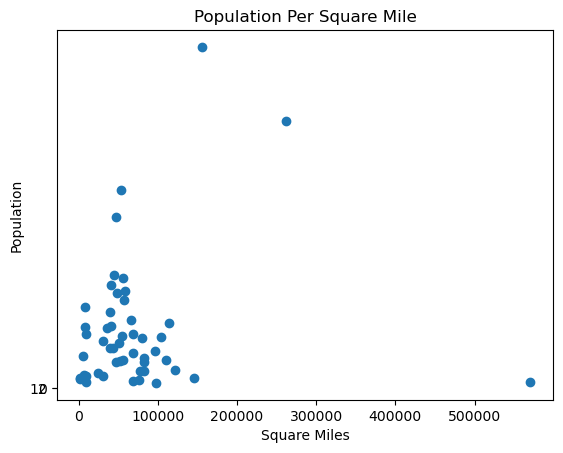

In [52]:
# Set the x and y axes with the right columns
X = states['Square_Miles']
Y = states['2023']
# use matplotlib plt.scatter
plt.scatter(X,Y)
# Give a good title
plt.title("Population Per Square Mile")
# Make some appropriate axis labels
plt.xlabel("Square Miles")
plt.ylabel("Population")
# Change the tick-marks on the y-axis
plt.yticks([0,10^6,20^])
plt.show()

In [56]:
states.sort_values('2023pop_per_sq_mile').head(10)

,State,2020,2021,2022,2023,pct_growth,Square_Miles,2023pop_per_sq_mile
1,Alaska,732964,734923,733276,733406,0.017729,570641,1.285232
49,Wyoming,577664,579548,581629,584057,0.417448,97105,6.014695
25,Montana,1087211,1106366,1122878,1132812,0.884691,145556,7.782654
33,North Dakota,779563,777982,778912,783926,0.643718,68994,11.362234
40,South Dakota,887852,896299,909869,919318,1.038501,75898,12.112546
30,New Mexico,2118488,2116950,2113476,2114371,0.042347,121365,17.421588
11,Idaho,1849339,1904537,1938996,1964726,1.326975,82751,23.742625
26,Nebraska,1963273,1964253,1968060,1978379,0.524323,76878,25.734007
27,Nevada,3115840,3146632,3177421,3194176,0.527314,109806,29.089267
15,Kansas,2938124,2937946,2936716,2940546,0.130418,81823,35.937890


What do you notice about the scatterplot? Can you guess which states are outliers?

Let's use `.sort_values()` to find the outliers.

In [ ]:
states.sort_values(...).head()

In [ ]:
states.sort_values(...).tail()

### Further reading:

[LA Times](https://www.latimes.com/california/story/2024-02-13/golden-state-loses-luster-half-of-americans-say-california-in-decline
) says Americans think California is on its decline. Do you agree?

No - because California is AWESOME!

Another [article](https://www.latimes.com/california/story/2023-08-04/l-a-county-in-2060-could-have-1-7-million-fewer-people-amid-california-exodus) suggests LA county will lose 1.7 million people by 2060, whereas Merced County is projected to gain 58 thousand people by 2060.

What factors do you think contribute most to this type of projection?

Again - cost of living and other thigns!